In [2]:

# Data Splitting
# Training and evaluation of a model
# Most common ratios, 20testing - 80training, 30, 70
# import Sckit-learn help to splite train_test_split

# Random state is used to shuffle data before splitting it into a training and test set. 

# Cross validation  - evaluate the performance of the data, multiple folds
# validation helps us know the performance of a model

# Types of cross validation are; train/test we can use K-Fold Cross Validation 
# Stratified k-Fold, Ensure our distribution of the target variable, particularly used in the imbalance datasets
# Cross validation helps in reducing variance in model performance estimates
# Provides a comprehensive evaluation of model performance 
# you should show the algorithm being used in your work.

# Supervised learning Algorithm
# 1. Regression, Linear or Polynomial 
# 2. Classification, (problems can be)
# Logistic regression, k-Nearest Neighbors(kNN), Support Vector Machine(SVM), Decision Trees and Random Forest

# Model Evaluation
# we have metrics 
# Metrics: Accuracy, Precision, Recall, F1-Score
# Confusion Matrix,
# AUC and ROC, Area Under the Curve, Receiver Operating characteristics Curve 


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# Load the dataset
data = pd.read_csv(r'heart.csv')

# Display the first few rows of the dataset
print(data.head().to_string())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1        0      150      0      2.3      0   0     1       1
1   37    1   2       130   250    0        1      187      0      3.5      0   0     2       1
2   41    0   1       130   204    0        0      172      0      1.4      2   0     2       1
3   56    1   1       120   236    0        1      178      0      0.8      2   0     2       1
4   57    0   0       120   354    0        1      163      1      0.6      2   0     2       1


In [5]:
# Split the data into features (X) and target (y)
X = data.drop('target', axis=1) # creates a new dataframe X, removes target column from the original data frame (data)
# axis = 1 specifies removal along columns and 0 for rows.
# X is a column used to predict the target variable
# X now represents features or independent variables 

y = data['target'] # assigns target column to dataframe y
# y represents target variable or dependent variables
# predicts features based on X
# target column represents values you want to predict 


In [14]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#train_test_split function is used for splitting data into training and testing sets.

# test_size=0.2: portion of data allocated to the testing set. 
# 0.2 (20%) of the data will be used for testing. remaining 0.8 (80%) for training. 

#random_state=42: sets a seed for the random number generator used to 
#shuffle the data before splitting. makes sure you'll get the same split each time you run the code with this seed.

#stratify=y: useful when dealing with classification problems where you have multiple 
# categories in your target variable (y). It ensures that the proportions of each class are preserved in 
# both the training and testing sets. This is important to avoid training a model that is biased towards 
# the majority class in your data.

# check the split
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (242, 13)
y_train:  (242,)
X_test:  (61, 13)
y_test:  (61,)


In [7]:

# Cross validation
# Cross-validation is a technique used in machine learning to evaluate the performance of a model on unseen data.
# cross validation splits the training data into multiple folds (usually k folds)
# It then trains the model on a combination of these folds and tests it on the remaining fold, 
# repeating this process for all folds



In [8]:
# Define a function to perform cross-validation and evaluate the models
def evaluate_model(model, X_train, y_train, X_test, y_test):
   
 # model:  the machine learning model you want to evaluate (e.g., a classification model).
# X_train: the training data for the features (independent variables).
# y_train: training data for the target variable (dependent variable).
# X_test:  testing data for the features (optional, used for final evaluation after cross-validation).
# y_test:  testing data for the target variable (optional, used for final evaluation after cross-validation).
    
    # Perform 5-fold cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    
    # sklearn.model_selection performs the cross-validation using the specified cv object.
    # It trains the model on each fold of the training data (using the remaining folds for validation)
    # and evaluates its performance on the validation fold using the provided scoring metric (scoring='accuracy').
    # In this case, the metric is set to 'accuracy', which is a common choice for classification tasks.
    
    # cv_scores stores the accuracy scores achieved by the model on each fold of the cross-validation process.
    
    
    # Train the model on the entire training set
    model.fit(X_train, y_train) # trains the machine learning model (model) on the entire training data
    #(X_train for features and y_train for the target variable).
    
    # Make predictions on the test set
    y_pred = model.predict(X_test) # uses the trained model to make predictions for the unseen testing data(X_test)
    #y_pred stores the predicted target values for each sample in the testing set.
    
    y_pred_proba = model.predict_proba(X_test)[:, 1] #uses training data to calculate the probability of each class for each sample in the testing set using predict_proba.
    # [:, 1]  extracts the probability of the positive class
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    
      # Print evaluation metrics
    print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'AUC: {auc:.2f}')
    
    
    
   # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred) # calculates the confusion matrix 
    # y_test actual- target values for the testing set.
    # y_pred represents the model's predicted target values for the testing set.
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens') #  creates a heatmap visualization of the confusion matrix 
    
    #annot=True displays the actual values in each cell of the heatmap.
    #fmt='d' specifies the format for the cell values (integers in this case).
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    
      # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba) # unpacks the output of roc_curve and assigns the first two values 
    
    # (False Positive Rate and True Positive Rate) to variables fpr and tpr, respectively.
    # roc_curve(y_test, y_pred_proba) --calculates the Receiver Operating Characteristic (ROC) curve
    # ROC curve - It helps assess a model's ability to discriminate between positive and negative classes
    
    #An ROC curve plots the True Positive Rate (TPR) on the y-axis against the False Positive Rate (FPR) on the x-axis.
    
    plt.plot(fpr, tpr, color='red', label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    
      # Print evaluation metrics
    print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'AUC: {auc:.2f}')
    
    
    
   # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred) # calculates the confusion matrix 
    # y_test actual- target values for the testing set.
    # y_pred represents the model's predicted target values for the testing set.
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu') #  creates a heatmap visualization of the confusion matrix 
    
    #annot=True displays the actual values in each cell of the heatmap.
    #fmt='d' specifies the format for the cell values (integers in this case).
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    
      # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba) # unpacks the output of roc_curve and assigns the first two values 
    
    # (False Positive Rate and True Positive Rate) to variables fpr and tpr, respectively.
    # roc_curve(y_test, y_pred_proba) --calculates the Receiver Operating Characteristic (ROC) curve
    # ROC curve - It helps assess a model's ability to discriminate between positive and negative classes
    
    #An ROC curve plots the True Positive Rate (TPR) on the y-axis against the False Positive Rate (FPR) on the x-axis.
    
    plt.plot(fpr, tpr,color='red', label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()



--- Logistic Regression ---
Cross-Validation Accuracy: 0.81 ± 0.09
Accuracy: 0.80
Precision: 0.77
Recall: 0.91
F1 Score: 0.83
AUC: 0.87


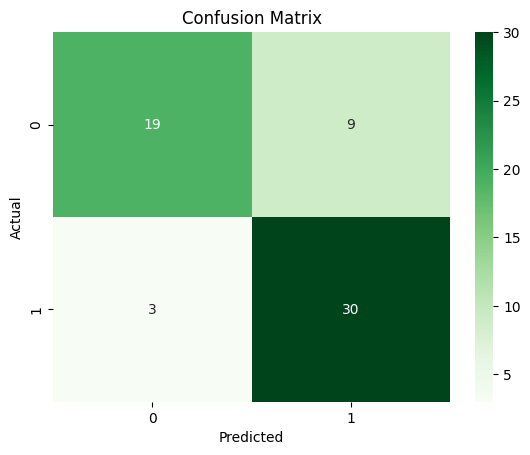

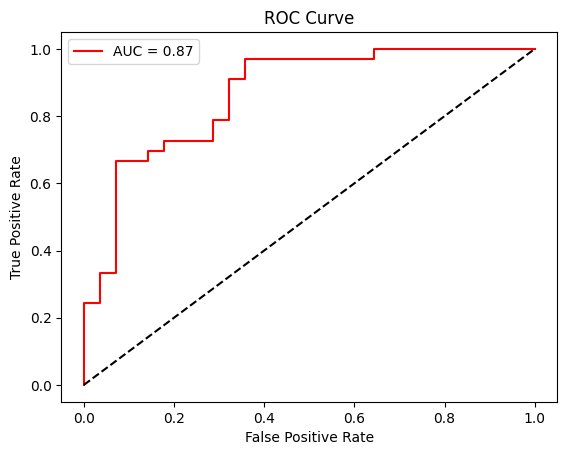

Cross-Validation Accuracy: 0.81 ± 0.09
Accuracy: 0.80
Precision: 0.77
Recall: 0.91
F1 Score: 0.83
AUC: 0.87


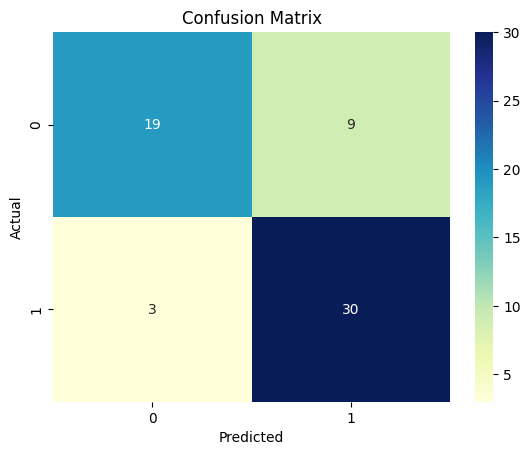

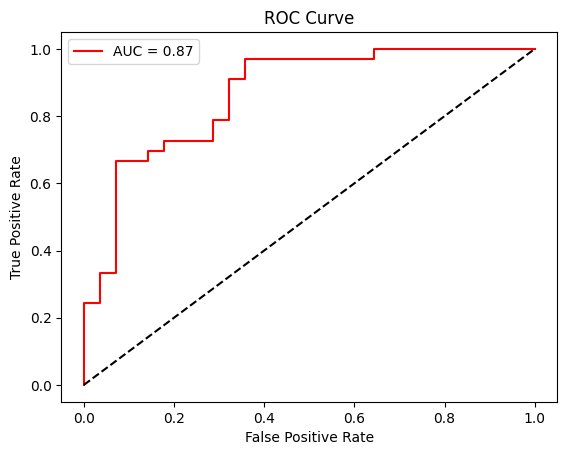



--- k-Nearest Neighbors ---
Cross-Validation Accuracy: 0.67 ± 0.01
Accuracy: 0.59
Precision: 0.62
Recall: 0.61
F1 Score: 0.62
AUC: 0.64


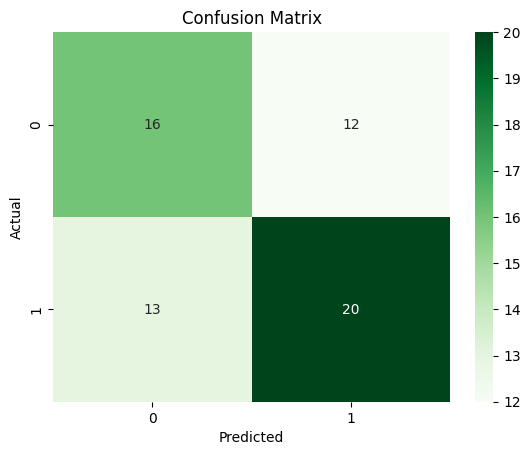

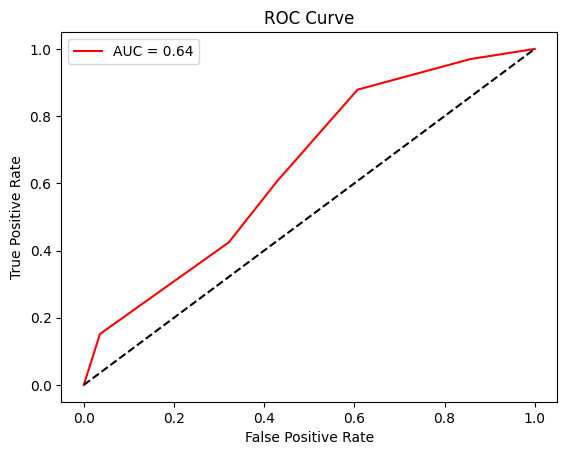

Cross-Validation Accuracy: 0.67 ± 0.01
Accuracy: 0.59
Precision: 0.62
Recall: 0.61
F1 Score: 0.62
AUC: 0.64


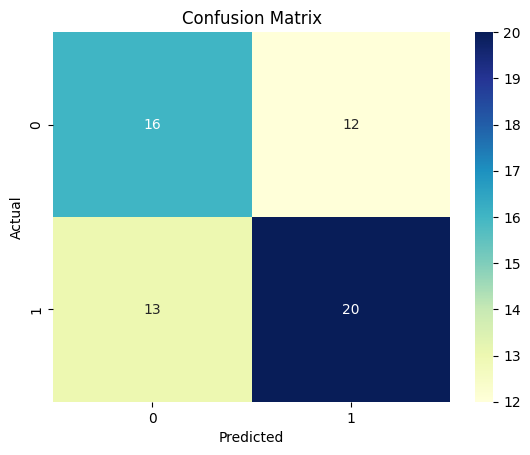

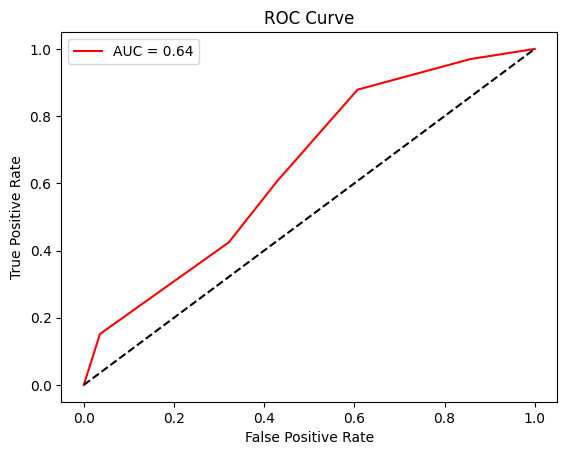



--- Support Vector Machine ---
Cross-Validation Accuracy: 0.64 ± 0.09
Accuracy: 0.66
Precision: 0.65
Recall: 0.79
F1 Score: 0.71
AUC: 0.70


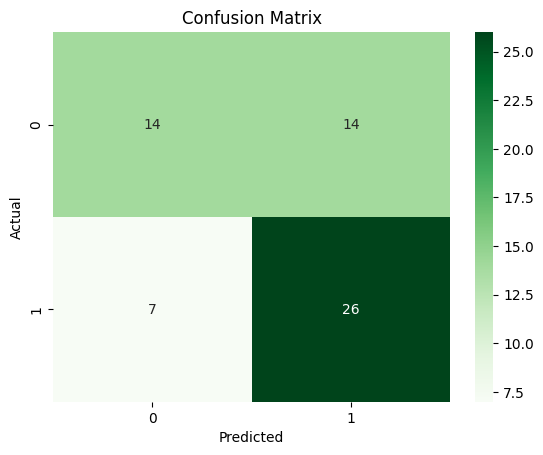

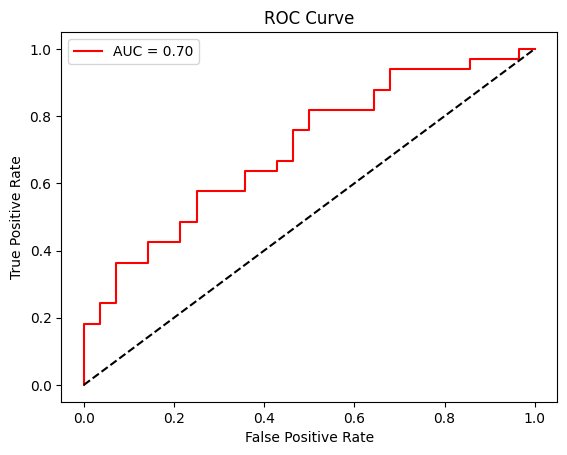

Cross-Validation Accuracy: 0.64 ± 0.09
Accuracy: 0.66
Precision: 0.65
Recall: 0.79
F1 Score: 0.71
AUC: 0.70


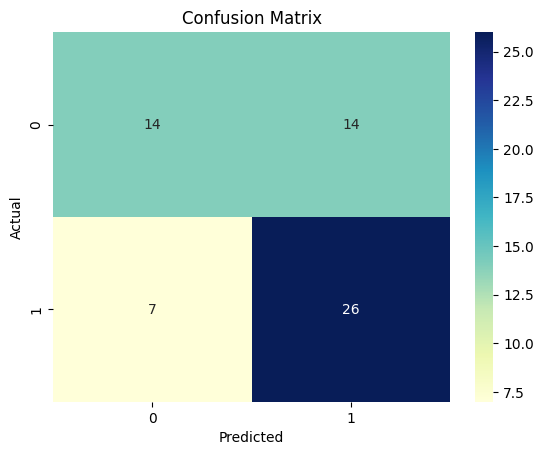

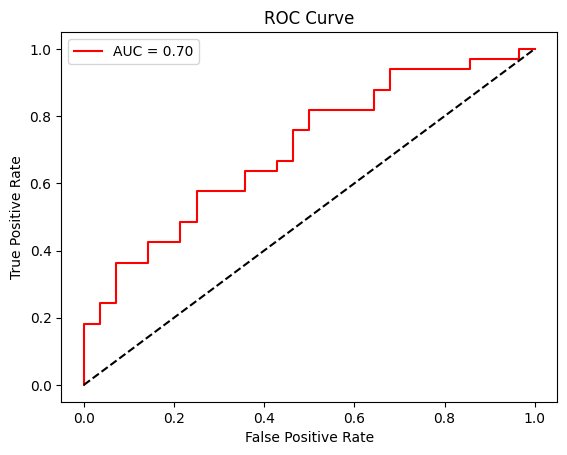



--- Decision Tree ---
Cross-Validation Accuracy: 0.73 ± 0.09
Accuracy: 0.70
Precision: 0.70
Recall: 0.79
F1 Score: 0.74
AUC: 0.70


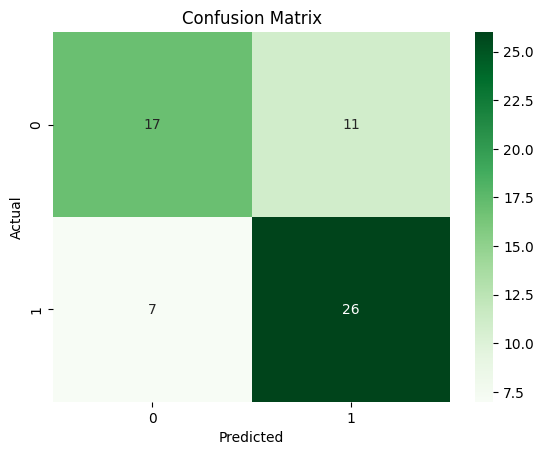

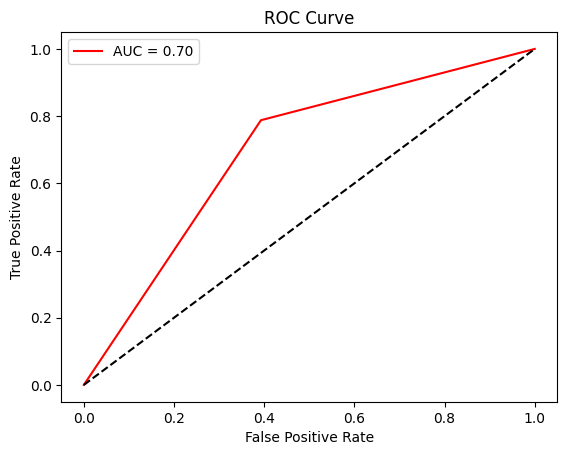

Cross-Validation Accuracy: 0.73 ± 0.09
Accuracy: 0.70
Precision: 0.70
Recall: 0.79
F1 Score: 0.74
AUC: 0.70


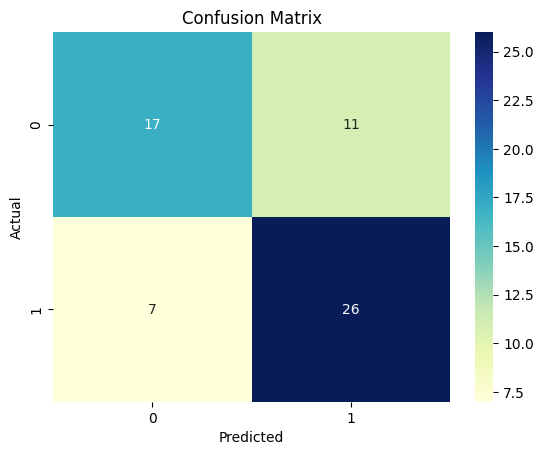

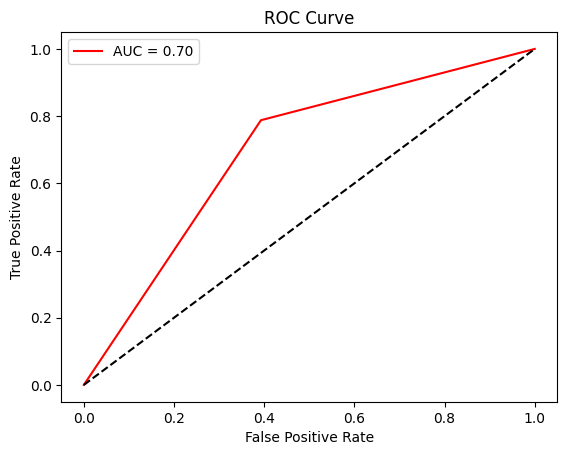



--- Random Forest ---
Cross-Validation Accuracy: 0.80 ± 0.07
Accuracy: 0.84
Precision: 0.78
Recall: 0.97
F1 Score: 0.86
AUC: 0.92


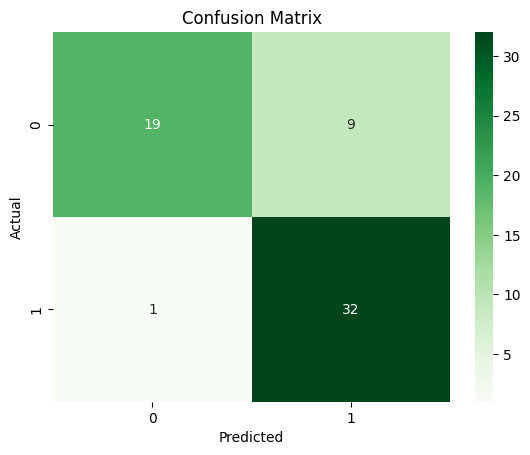

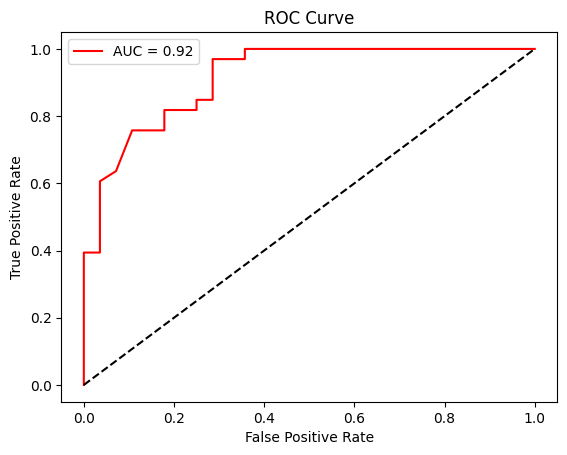

Cross-Validation Accuracy: 0.80 ± 0.07
Accuracy: 0.84
Precision: 0.78
Recall: 0.97
F1 Score: 0.86
AUC: 0.92


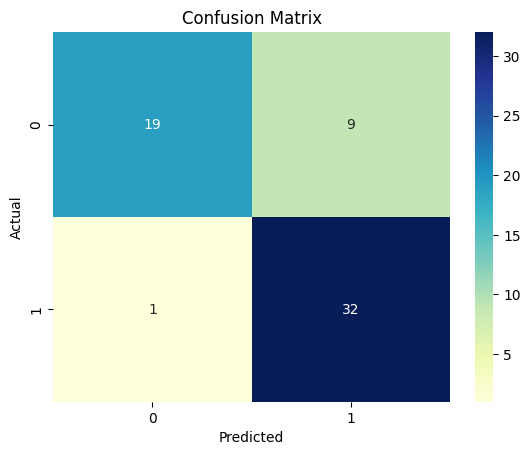

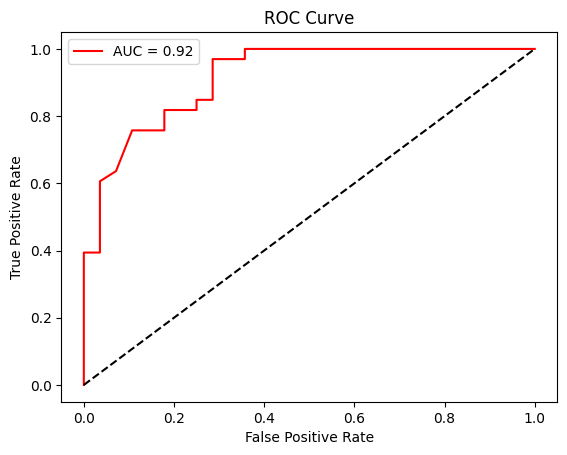

In [9]:

# Define the models to be evaluated
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Evaluate each model
for name, model in models.items():
    print(f'--- {name} ---')
    evaluate_model(model, X_train, y_train, X_test, y_test)
    print('\n')